In [1]:
from matplotlib import pyplot as plt
import numpy as np
from iminuit import Minuit
from scipy.stats import norm
from scipy import integrate

In [2]:
higgs_mass1 = np.loadtxt("datafile-higgs.txt")


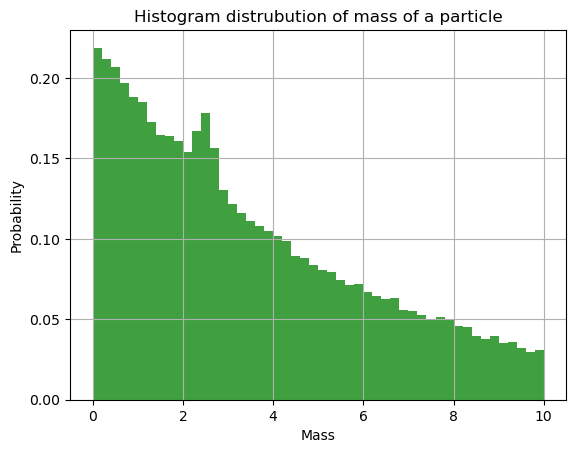

In [3]:
n, bins, patches = plt.hist(higgs_mass1, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Mass')
plt.ylabel('Probability')
plt.title('Histogram distrubution of mass of a particle')
plt.grid(True)
plt.show()

In [4]:
class higgs_mass:
    def __init__(self, mass, xmin,xmax, mean, sigma):
        self.mass = mass
        self.xmin = xmin
        self.xmax = xmax
        self.mean = mean
        self.sigma =sigma
    
    def fit_1(self,f ,A,M ): # method for exponential background and gaussian signal

        expo_bgb = lambda x, A: np.exp(-x/A)

        normalise = integrate.quad(expo_bgb, self.xmin, self.xmax, args=(A))

        y2 = (1/normalise[0])*(np.exp(-self.mass/A))


        
        gauss = norm.pdf(self.mass, loc= M , scale = self.sigma) 
        
        self.expo_bgb = f*y2 +(1-f)*gauss   # saves the prediction of the model with the best parameters 

        pdf_combined = np.log((f)*y2 + (1-f)*gauss)

        nnl_combined = -np.sum(pdf_combined)

        self.log1 = nnl_combined
        return nnl_combined 

    
    
    def fit_2(self,b, c ,M, f):  # method for secomnd order polynomial background and Gaussian signal
        
        a =1
        poly_bgb = lambda x, a , b , c: a + b*x + c*(x**2) 

        normalise = integrate.quad(poly_bgb, self.xmin, self.xmax, args=(a , b, c))

        y2 = (1/normalise[0])* (1 + b*self.mass + c*(self.mass**2))
        
        


        
        gauss = norm.pdf(self.mass, loc= M , scale = self.sigma) 
        
        gauss_poly = (f)*y2 + (1-f)*gauss
        
        gauss_poly[gauss_poly < 0.0] = 0.001 
        
        self.gauss_poly = gauss_poly

        pdf_combined = np.log(gauss_poly)
        
        
        

        nnl_combined = -np.sum(pdf_combined)
        

        self.log2 = nnl_combined
        return nnl_combined  
    
    
    def fit_3(self,b,M, f):  # method for linear background and gausian signal
        
        a =1
        linear_bgb = lambda x, a , b : a + b*x 

        normalise = integrate.quad(linear_bgb, self.xmin, self.xmax, args=(a , b))

        y2 = (1/normalise[0])* (1 + b*self.mass )
        
        


        
        gauss = norm.pdf(self.mass, loc= M , scale = self.sigma) 
        
        gauss_poly = (f)*y2 + (1-f)*gauss
        
        gauss_poly[gauss_poly < 0.0] = 0.001 
        
        self.gauss_linear = gauss_poly

        pdf_combined = np.log(gauss_poly)
        
        
        

        nnl_combined = -np.sum(pdf_combined)
        

        self.log3 = nnl_combined
        
        return nnl_combined  
        

### Part 1

In [5]:
pdf1 =  higgs_mass(higgs_mass1,0, 10, 2.5 ,0.2)

In [6]:
startvals ={'f' : 0.97, 'A' : 5.2 ,'M' : 2.1}
m = Minuit(pdf1.fit_1, **startvals)
m.errordef = 0.5
m.migrad()  

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.146e+05                  │              Nfcn = 78               │
│ EDM = 1.55e-06 (Goal: 0.0001)    │            time = 0.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ f    │  0.9796   │  0.0012   │            │            │         │         │       │
│ 1 │ A    │   5.008   │   0.031   │            │            │         │         │       │
│ 2 │ M    │   2.499   │   0.015   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         f         A         M │
├───┼───────────────────────────────┤
│ f │  1.33e-06 -4.01e-06     7e-07 │
│ A │ -4.01e-06  0.000945  -1.7e-05 │
│ M │     7e-07  -1.7e-05  0.000212 │
└───┴───────────────────────────────┘

In [7]:
expo_params = list(m.values)
expo_params

[0.979605564525648, 5.007817585441475, 2.4985567538499494]

In [8]:
expo_params_err = list(m.errors)

The best fit values for the for the mass distribution modelled by an exponential background and a Gaussian peak are:
<ul>
    <li> Mean of Gaussain peak signal = 2.50 ± 0.01 </li>
    <li> Fraction of background signal = 0.980 ± 0.001 </li>
    <li> Exponential factor, A = 5.01 ± 0.03 </li>
</ul>

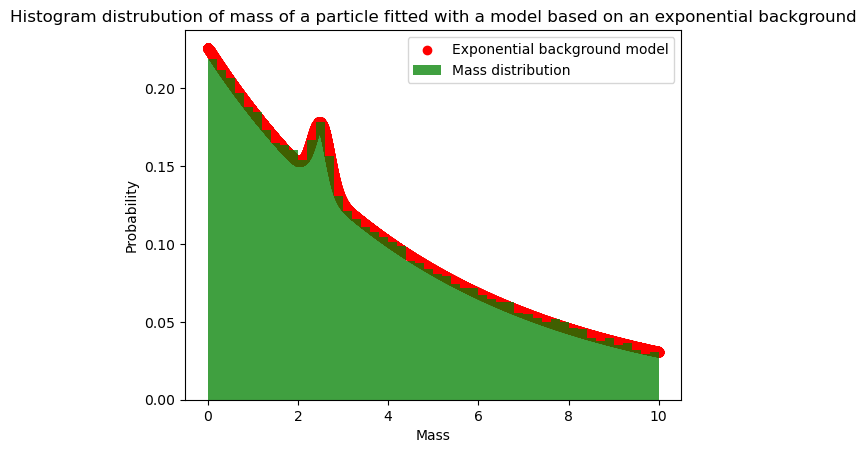

In [9]:
plt.scatter(pdf1.mass, pdf1.expo_bgb, color = 'r', label ='Exponential background model')
n, bins, patches = plt.hist(higgs_mass1, 50, density=True, facecolor='g', alpha=0.75, label = 'Mass distribution')


plt.xlabel('Mass')
plt.ylabel('Probability')
plt.title('Histogram distrubution of mass of a particle fitted with a model based on an exponential background')
plt.legend()
plt.show()
    

### part 2

In [10]:
startvals ={'b' : -0.016, 'c' : 0.007 ,'M' : 2.5, 'f' : 0.98 }
m2 = Minuit(pdf1.fit_2, **startvals)
m2.errordef = 0.5
m2.migrad()  

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.146e+05                  │              Nfcn = 132              │
│ EDM = 1.45e-06 (Goal: 0.0001)    │            time = 1.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │  -0.1578  │  0.0011   │            │            │         │         │       │
│ 1 │ c    │  7.30e-3  │  0.12e-3  │            │            │         │         │       │
│ 2 │ M    │   2.494   │   0.016   │            │            │         │         │       │
│ 3 │ f    │  0.9820   │  0.0012   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────────┐
│   │         b         c         M         f │
├───┼─────────────────────────────────────────┤
│ b │  1.14e-06 -1.23e-07 -5.72e-07 -3.44e-08 │
│ c │ -1.23e-07   1.4e-08  5.72e-08 -6.66e-10 │
│ M │ -5.72e-07  5.72e-08  0.000244  7.04e-07 │
│ f │ -3.44e-08 -6.66e-10  7.04e-07  1.35e-06 │
└───┴─────────────────────────────────────────┘

In [11]:
poly_params= list(m2.values)

In [12]:
poly_params_err = list(m2.errors)

In [13]:
sys_err1 = abs(poly_params[2] - expo_params[2]) # gives a gauge of the systematic error on the mean of the Gaussian peak


The best fit values for the mass distribution modelled by a second order polynomial and a Gaussian peak are:
<ul>
    <li> Second coefficient of polynomial = -0.158 ± 0.001 </li>
    <li> Third coeffcient of polynomial = 0.0073 ± 0.0001 </li>
    <li> Fraction of background signal = 0.982 ± 0.001 </li>
</ul>

The value of the mean can now be stated taking into account some measure of its systematic error. 
The mean of the Gaussian signal is; M = 2.49 ± 0.02 ± 0.004

By adding the errors in quadrature, the mean can be stated as;
M = 2.49 ± 0.02

Since, the systematic error is much less than the statistical error, one can be confident in the measured mean parameter.


Using the exponential model to give the value of the mean: M = 2.50 ± 0.01 ± 0.004 ; M = 2.50 ± 0.01

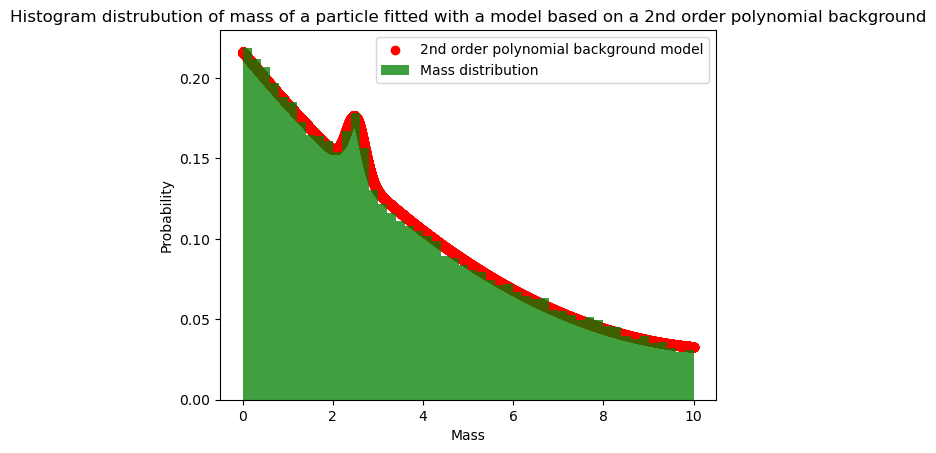

In [14]:
plt.scatter(pdf1.mass, pdf1.gauss_poly, color = 'r', label ='2nd order polynomial background model')
n, bins, patches = plt.hist(higgs_mass1, 50, density=True, facecolor='g', alpha=0.75, label = 'Mass distribution')


plt.xlabel('Mass')
plt.ylabel('Probability')
plt.title('Histogram distrubution of mass of a particle fitted with a model based on a 2nd order polynomial background')
plt.legend()
plt.show()
    

### Part 3

In [15]:
startvals ={'b' : -0.09, 'M' : 2.5 , 'f' : 0.98 }
m3 = Minuit(pdf1.fit_3, **startvals)
m3.errordef = 0.5
m3.migrad()  

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.155e+05                  │              Nfcn = 50               │
│ EDM = 3.95e-06 (Goal: 0.0001)    │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │ -90.41e-3 │  0.22e-3  │            │            │         │         │       │
│ 1 │ M    │   2.465   │   0.015   │            │            │         │         │       │
│ 2 │ f    │  0.9801   │  0.0012   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         b         M         f │
├───┼───────────────────────────────┤
│ b │  4.97e-08 -5.11e-08 -3.36e-08 │
│ M │ -5.11e-08  0.000229  6.04e-07 │
│ f │ -3.36e-08  6.04e-07  1.35e-06 │
└───┴───────────────────────────────┘

In [16]:
linear_params = list(m3.values)

In [17]:
linear_params_err = list(m3.errors)

In [18]:
m3.values

<ValueView b=-0.09040502851072868 M=2.4654049677402585 f=0.9801233035480988>

In [19]:
m3.errors

<ErrorView b=0.00022291013228074755 M=0.015138099762456685 f=0.00116149942060938>

In [20]:
#systematic error in mean is estimated by finding the maximum difference in mean using between the three models.
sys_err2 = max(abs(poly_params[2] - expo_params[2]),abs(expo_params[2] - linear_params[1]), abs(poly_params[2]- linear_params[1]))
#In this case, the systematic error is given by the difference between the mean of the best model and the mean of he worst model.

The best fit values for the mass distribution modelled by a linear background and a Gaussian peak are:
<ul>
    <li> Second coefficient of polynomial,b = -0.0904 ± 0.0002 </li> 
    <li> Fraction of background signal, f = 0.980 ± 0.001 </li>
</ul>


The mean of the Gaussian signal is; M = 2.47 ± 0.02 ± 0.03

By adding the errors in quadrature, the mean can be stated as;
M = 2.47 ± 0.04

The systematic error was obtained from the difference in the best fit model(model with exponential background) and the worst fit model(model with linear background). In this case, the systematic error is greater than than the statistical error and, cannot be ignored. One would have to investigate ways to reduce uncertainty in the data collection process.

Using the exponenetial model to give the value of the mean; M = 2.50 ± 0.01 ± 0.03; M = 2.50 ± 0.03

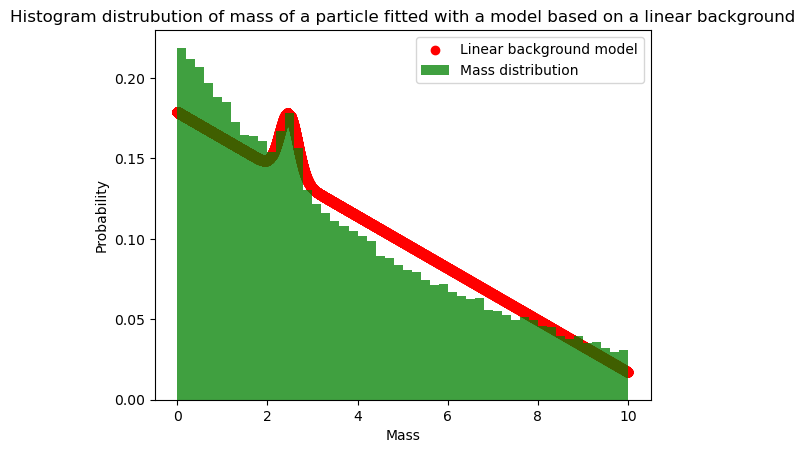

In [21]:
plt.scatter(pdf1.mass, pdf1.gauss_linear, color = 'r', label ='Linear background model')
n, bins, patches = plt.hist(higgs_mass1, 50, density=True, facecolor='g', alpha=0.75, label = 'Mass distribution')


plt.xlabel('Mass')
plt.ylabel('Probability')
plt.title('Histogram distrubution of mass of a particle fitted with a model based on a linear background')
plt.legend()
plt.show()
    